# *UFC - Quixadá* 
PDI - Processamento Digital de Imagens

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [2]:
#Abrindo imagem
#im1 = cv2.imread('../Imagens/1.jpg',0)
#im2 = cv2.imread('../Imagens/2.jpg',0)
im = cv2.imread('../Imagens/0.jpg',0)
#(1529, 3989)

im1 = im[:,:2245]
im2 = im[:,1723:]

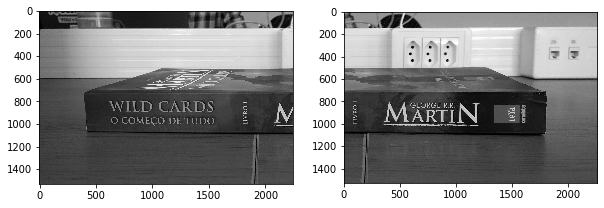

In [3]:
#Configuração de tamanho de plot.
#Plotagem  das imagens
plt.figure(figsize=(10, 10))
plt.subplot(221),plt.imshow(im1,'gray');
plt.subplot(222),plt.imshow(im2,'gray');


In [4]:
#Dimensões das imagens
im1.shape, im2.shape

((1529, 2245), (1529, 2266))

In [5]:
#MSE do sklearn
im_mse = mse(im1, im1)
print(im_mse)

0.0


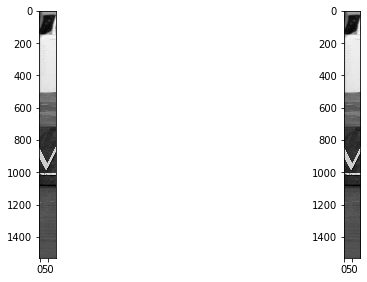

In [6]:
#testanto aproximação
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(im1[:,-100:],'gray');
plt.subplot(222), plt.imshow(im2[:,422:522],'gray');

In [7]:
#Calculando MSE da aproximação
e = mse(im1[:,-100:], im2[:,422:522])
print(e)

0.0


In [8]:
#Encontrando o menor MSE entre as imagens
# prefinindo que o loop não pegue inconsistências.
j = im1.shape[1] - 100 
# vetor para guardar os MSE
im_mse=[]
# k é igual ao tamanho da seção que será comparada.
k = 100
for i in range(0,j, 1):
    im_mse.append( mse(im1[:, -k:], im2[:, i:(i+k)]) ) 
   
    
min_mse = np.min(im_mse)
pos_mse = im_mse.index(min_mse) + k

print('MSE_min:',min_mse)
print('im1[:,-100 :,]')
print('im2[:,',pos_mse,':',pos_mse+100,']')
print('Posição i=',pos_mse)

MSE_min: 0.0
im1[:,-100 :,]
im2[:, 522 : 622 ]
Posição i= 522


In [9]:
#Tamanho de  J e I.
print('Tamanho de  J e I:')
print('j:',j)
print('i:',i)

Tamanho de  J e I:
j: 2145
i: 2144


### fundir as imagens

In [10]:
# Criando uma matriz de Zeros
im_white = np.zeros((im.shape[0], im.shape[1]))
im_white.shape

(1529, 3989)

In [11]:
# Alocando as imagens 1 e 2 na matriz vazia
im_white[ :, :im1.shape[1]] = im1
im_white[ :, im1.shape[1]:] = im2[: , pos_mse:]

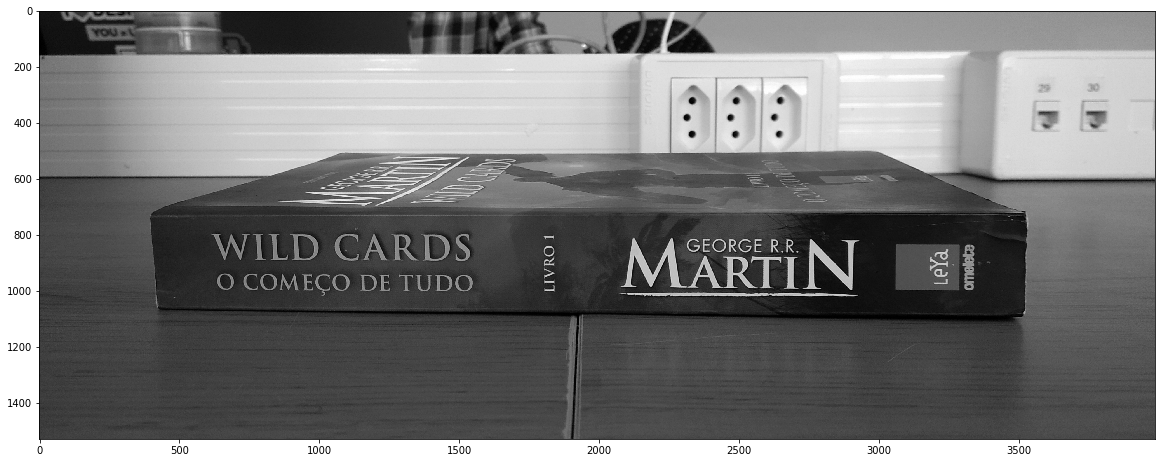

In [12]:
# plot
plt.figure(figsize=(20,20))
plt.imshow(im_white,'gray');